<a href="https://colab.research.google.com/github/BBhargaviRao/Titanic_EDA/blob/main/DS_Programming2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load the Titanic Dataset
We’ll use the pandas library to load the Titanic dataset, which can be found in the
kaggle datasets.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
# Specify the engine explicitly as either 'openpyxl' (for .xlsx) or 'xlrd' (for .xls)
# If the file is actually a CSV, change the extension to .csv and remove the engine argument
try:
    df = pd.read_excel('/content/tested.csv', engine='xlrd')  # Try xlrd for older .xls format
except:
    df = pd.read_csv('/content/tested.csv') # Try reading as csv if xlrd fails


# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Step 2: Data Inspection
Inspect the structure of the data, including its columns, data types, and missing values.

In [ ]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Step 3: Descriptive Statistics
Generate statistical summaries and visualizations for a deeper look into the data.

In [ ]:
# Summary statistics for numerical columns
df.describe()

# Summary statistics for categorical columns
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Step 4: Data Cleaning
Handle missing values and clean the data to ensure a smooth analysis

In [ ]:
# Fill missing values in 'age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'embarked' values with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# If there are any missing values in 'Fare', fill with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

<ipython-input-7-024187a8e56b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-024187a8e56b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Step 5: Data Visualizations
Visualize the relationships between features and survival rates.

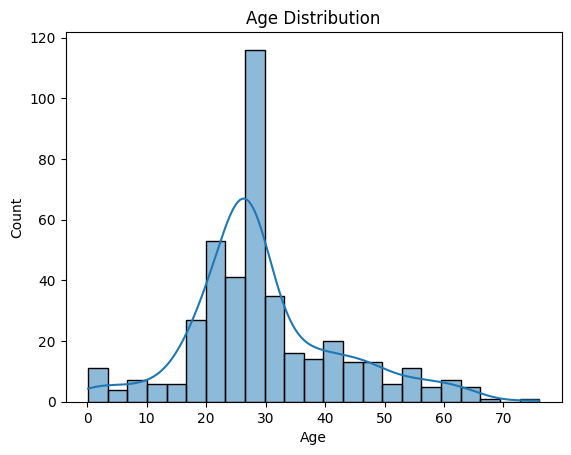

In [ ]:
# Distribution of ages
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

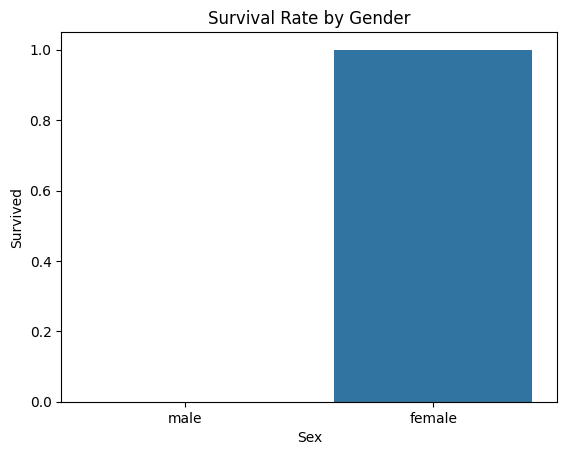

In [ ]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


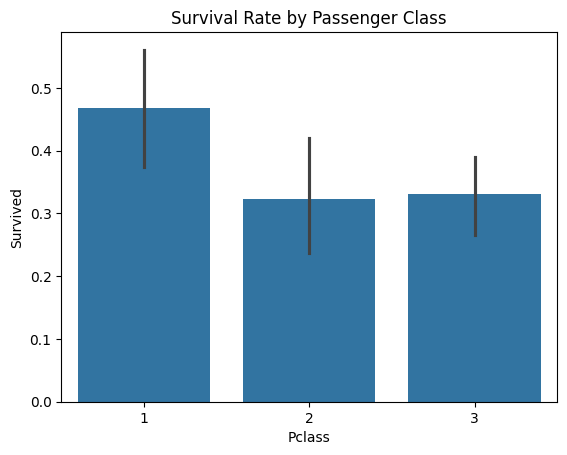

In [ ]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


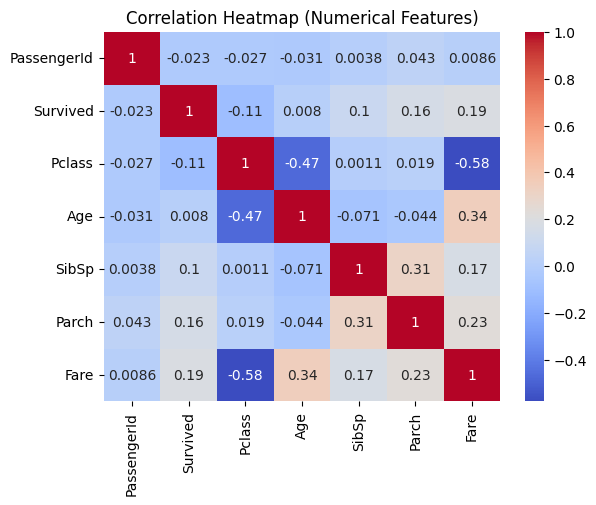

In [ ]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


Feature Engineering: We create new features like "Family_Size" and "Fare_per_Person" to capture additional insights beyond raw data.

In [ ]:
# Feature Engineering
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Fare_per_Person'] = df['Fare'] / (df['Family_Size'] + 1)

# Example of more complex feature interactions can be added here based on your analysis needs

# Data Cleaning
# Fill missing values (if any) and handle categorical variables as needed

# Display the updated dataframe
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Fare_per_Person
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,7.829200
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,3.500000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,9.687500
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,8.662500
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,4.095833


Text Analysis of Passenger Names: Using NLP techniques, we extract titles from passenger names to understand if titles correlate with survival.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Example function to tokenize names and extract useful information (you can customize this further)
def extract_title(name):
    tokens = word_tokenize(name)
    tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    for token in tokens:
        if token.lower() in ['mr.', 'mrs.', 'miss.', 'master.']:
            return token
    return 'None'

df['Title'] = df['Name'].apply(lambda x: extract_title(x))

# Display the updated dataframe
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Fare_per_Person,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,7.829200,Mr.
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,3.500000,Mrs.
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,9.687500,Mr.
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,8.662500,Mr.
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,4.095833,Mrs.
